## Домашнее задание к уроку "Урок 7. Многомерный статистический анализ. Линейная регрессия"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# график величин и модели линейной регрессии для этих величин
def draw_X_y_y_hat_plot(X, y, y_hat):
    plt.scatter(X, y, label = 'Реальные значения')
    plt.plot(X, y_hat, color='g', label = 'Прямая линейной регрессии')
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

In [3]:
# расчёт коэффициента b по формуле первым способом
def b_coefficient_1(X, y):
    return (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)

In [4]:
# расчёт коэффициента b по формуле вторым способом
def b_coefficient_2(X, y):
    n = X.shape[0]
    return (n * (np.sum(X * y)) - (np.sum(X) * np.sum(y))) / (n * (np.sum(X**2)) - (np.sum(X)**2))

In [5]:
# расчёт коэффициента a по формуле
def a_coefficient(X, y, b):
    return np.mean(y) - b * np.mean(X)

In [6]:
# расчёт предсказываемой величины
def make_y_hat(X, a, b):
    return a + b * X

In [7]:
def mse_h_hat(y, y_hat, n):
    return ((y - y_hat)**2).sum()/n

In [8]:
# преобразование массива в матрицу для расчёта
def array_to_matrix(array):
    return array.reshape((array.shape[0], 1))

In [9]:
# добавление нулевого столбца единиц в матрицу
def add_ones_to_matrix(matrix):
    return np.hstack([np.ones(matrix.shape), matrix])

In [10]:
# матричный расчёт коэффициентов a и b
def B_matrix(X_matrix, y_matrix):
    return np.dot(np.linalg.inv(np.dot(X_matrix.T, X_matrix)), X_matrix.T@y_matrix)

**1\. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [11]:
# X
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [12]:
# y
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [13]:
# с intercept

In [14]:
# решение с помощью расчета коэффициентов по формулам

In [15]:
b = b_coefficient_1(zp, ks)
b

2.620538882402765

In [16]:
b = b_coefficient_2(zp, ks)
b

2.6205388824027653

In [17]:
a = a_coefficient(zp, ks, b)
a

444.17735732435955

In [18]:
y_hat = make_y_hat(zp, a, b)
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [19]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

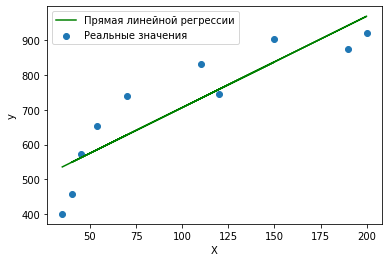

In [20]:
draw_X_y_y_hat_plot(zp, ks, y_hat)

In [21]:
n = zp.shape[0]

In [22]:
mse_h_hat(ks, y_hat, n)

6470.414201176658

In [23]:
# с помощью матричного метода

In [24]:
ZP = array_to_matrix(zp)
ZP

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [25]:
KS = array_to_matrix(ks)
KS

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [26]:
ZP = add_ones_to_matrix(ZP)
ZP

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [27]:
B = B_matrix(ZP, KS)
B

array([[444.17735732],
       [  2.62053888]])

In [28]:
a = B[0]
a

array([444.17735732])

In [29]:
b = B[1]
b

array([2.62053888])

In [30]:
y_hat = make_y_hat(zp, a, b)
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

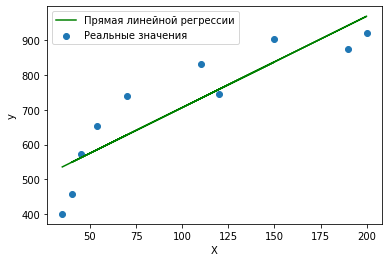

In [31]:
draw_X_y_y_hat_plot(zp, ks, y_hat)

In [32]:
mse_h_hat(ks, y_hat, n)

6470.41420117666

In [33]:
# без intercept

In [34]:
# с помощью матричного метода

In [35]:
ZP = array_to_matrix(zp)
ZP

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [36]:
KS = array_to_matrix(ks)
KS

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [37]:
B = B_matrix(ZP, KS)
B

array([[5.88982042]])

In [38]:
b = B[0]
b

array([5.88982042])

In [39]:
y_hat = make_y_hat(zp, 0, b)
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

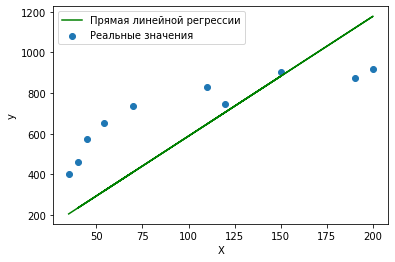

In [40]:
draw_X_y_y_hat_plot(zp, ks, y_hat)

In [41]:
mse_h_hat(ks, y_hat, n)

56516.8584157194

**2\. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [42]:
def my_mse(B1, X, y):
    n = X.shape[0]
    return np.sum((B1 * X - y)**2) / n

In [43]:
def mse_derrivative_1(B1, X, y):
    n = X.shape[0]
    return (1 / n) * np.sum(B1 * X - y)**2

In [44]:
def mse_derrivative_2(B1, X, y):
    n = X.shape[0]
    return (2 / n) * np.sum((B1 * X - y) * X)

In [45]:
def gradient_descent(α, B1, X, y, iteration, print_num=None):
    for i in range(iteration):
        B1_prev = B1
        mse_prev = my_mse(B1, X, y)
        B1 -= α * mse_derrivative_2(B1, X, y)
        mse_current = my_mse(B1, X, y)
        if print_num != None and i % print_num == 0:
            print(f'Iteration: {i}, B1 = {B1}, mse = {mse_current}')
        if B1 == B1_prev and mse_current == mse_prev:
            print(f'Iteration: {i-1}, B1 = {B1_prev}, mse = {mse_prev}')
            print(f'Iteration: {i}, B1 = {B1}, mse = {mse_current}')
            return B1

In [46]:
X = zp
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [47]:
y = ks
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [48]:
# скорость обучения
α = 1e-6
α

1e-06

In [49]:
# стартовое значение коэффициент линейной регрессии (без intercept)
B1 = 0.1

In [50]:
n = zp.shape[0]
n

10

In [51]:
# коэффициент линейной регрессии, рассчитанный с помощью градиентного спуска (без intercept)
gradient_descent(α, B1, X, y, 1500)

Iteration: 1195, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration: 1196, B1 = 5.889820420132673, mse = 56516.85841571943


5.889820420132673

**3\. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

In [52]:
# В обоих случаях выборка или генеральная совокупность должны быть распределены нормально.
# Таблица критических точек распределения Стьюдента используется для вычисления доверительных интервалов 
# и проверки статистических гипотез, когда неизвестна дисперсия (или среднее квадратичное отклонение) генеральной совокупности.
# Функция Лапласа использует критерий z, поэтому  таблица значений функции Лапласа используется, 
# когда точно известна дисперсия (или среднее квадратичное отклонение) генеральной совокупности, 
# также как и при определении z-критерия.

***4\. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [53]:
def my_mse_1(B0, B1, X, y):
    n = X.shape[0]
    return np.sum((B1 * X + B0 - y)**2) / n

In [54]:
def mse_derrivative_1_1(B0, B1, X, y):
    n = X.shape[0]
    return (1 / n) * np.sum(B1 * X + B0 - y)**2

In [55]:
def mse_derrivative_2_B0(B0, B1, X, y):
    n = X.shape[0]
    return (2 / n) * np.sum(B1 * X + B0 - y)

In [56]:
def mse_derrivative_2_B1(B0, B1, X, y):
    n = X.shape[0]
    return (2 / n) * np.sum((B1 * X + B0 - y) * X)

In [57]:
# with intercept
def gradient_descent_1(α, B0, B1, X, y, iteration, print_num=None, ε_n=5):
    for i in range(iteration):
        B0_prev = B0
        B1_prev = B1
        mse_prev = my_mse_1(B0, B1, X, y)
        
        B0 -= α * mse_derrivative_2_B0(B0_prev, B1_prev, X, y)
        B1 -= α * mse_derrivative_2_B1(B0_prev, B1_prev, X, y)
        mse_current = my_mse_1(B0, B1, X, y)
        if print_num != None and i % print_num == 0:
            print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_current}')
        if round(B0, ε_n) == round(B0_prev, ε_n) and round(B1, ε_n) == round(B1_prev, ε_n) \
        and round(mse_current, ε_n) == round(mse_prev, ε_n):
            print(f'Iteration: {i-1}, B0 = {B0_prev}, B1 = {B1_prev}, mse = {mse_prev}')
            print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_current}')
            return B0, B1

In [58]:
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [59]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [60]:
# скорость обучения
α = 7e-5
α

7e-05

In [61]:
# стартовое значение коэффициент линейной регрессии
B0 = 444

In [62]:
# стартовое значение коэффициент линейной регрессии
B1 = 2.5

In [63]:
n = zp.shape[0]
n

10

In [64]:
# коэффициенты линейной регрессии, рассчитанные с помощью градиентного спуска (с intercept) - (B0, B1)
gradient_descent_1(α, B0, B1, X, y, 500000, ε_n=12)

Iteration: 439486, B0 = 444.1773572949395, B1 = 2.62053888261931, mse = 6470.414201176658
Iteration: 439487, B0 = 444.1773572949405, B1 = 2.6205388826193032, mse = 6470.414201176658


(444.1773572949405, 2.6205388826193032)

In [65]:
# скорость обучения - количество шагов на вычисление коэффициентов (проверено опытным путём), иначе слишком большая ошибка
# 7e-5 - 439487
# 6e-5 - 508584
# 5e-5 - 602053
# 4e-5 - 741287
# 3e-5 - 969706
# 2e-5 - 1415336
# 1e-5 - 2691622